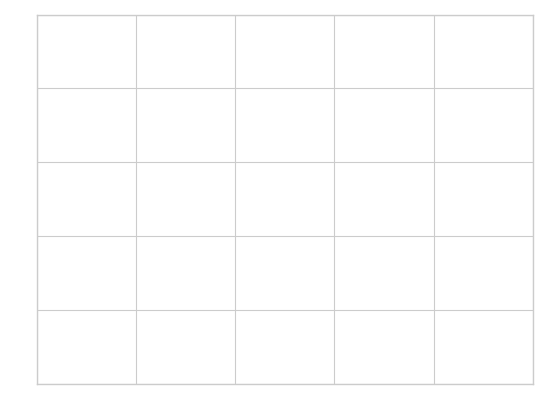

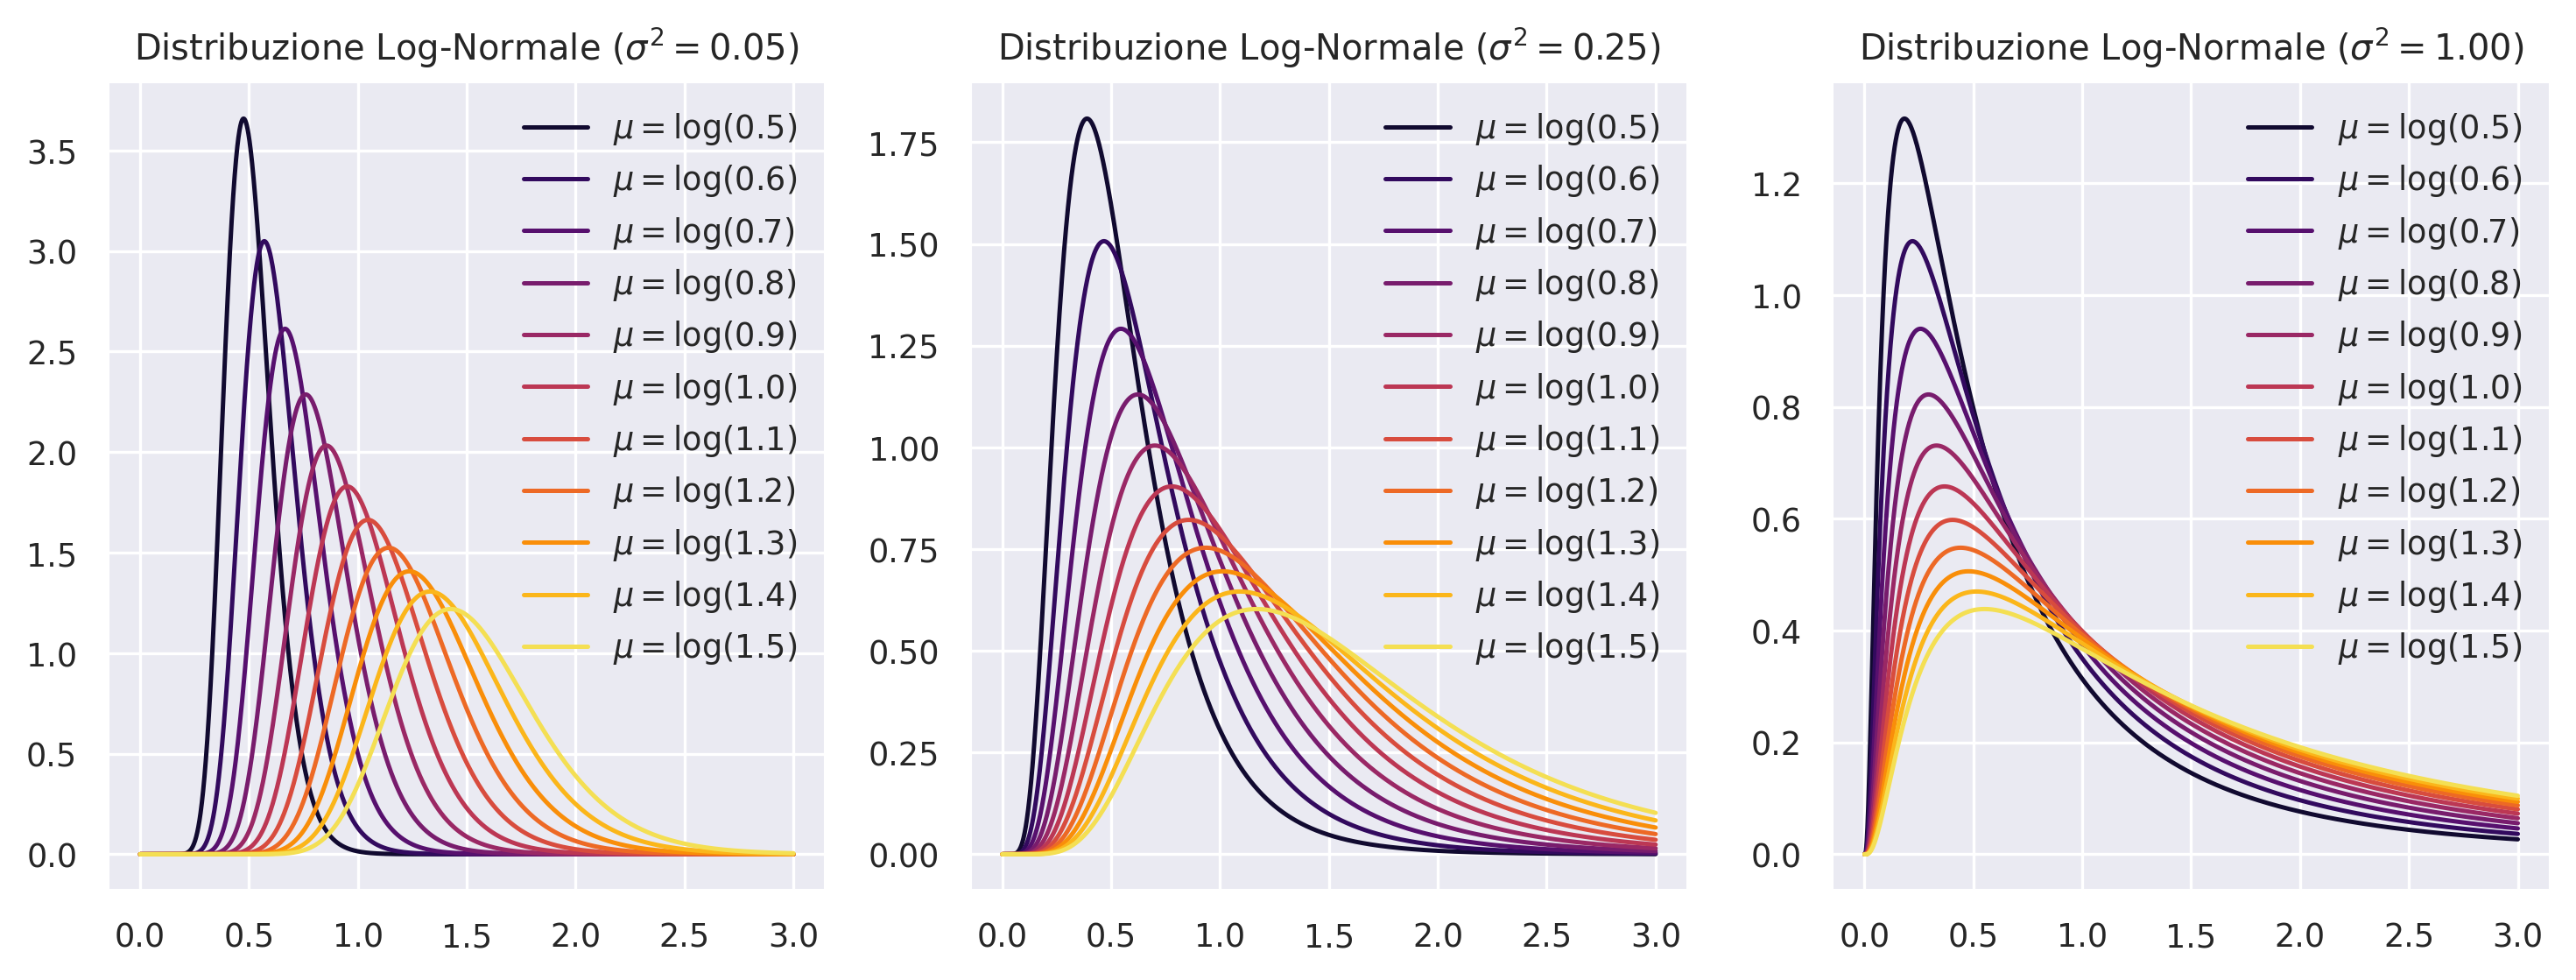

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import seaborn as sns
import math

#font
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')
#stileplot
#plt.style.use('seaborn-v0_8-notebook')
#plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')
#titolo
plt.suptitle("",fontsize=14,style='italic')#,weight='bold'

#nomi assi
plt.xlabel("", fontsize=12,style='italic')
plt.ylabel("", fontsize=12,style='italic')

#colore nuemero assi
plt.xticks(color="w") #w=white b=blu
plt.yticks(color="w") #w=white b=blu




def log_normal_distribution(x, mu, sigma_2):
    r = math.log(x) - mu
    return (1.0 / (x * math.sqrt(2.0 * math.pi * sigma_2))) * math.exp(-0.5 * (r * r) / sigma_2)


def create_varying_mu():
    # Define the resolution of mu variation
    num_samples_per_graph = 11

    # Define the list of sigma^2 values
    sigma_2_list = [0.05, 0.25, 1.00]

    # Define the x range (note: we cannot include x = 0 here)
    x = np.arange(0.001, 3.001, 0.001)

    # Prepare for graph plotting
    sns.set()
    sns.set_palette("inferno", num_samples_per_graph)
    sns.set_context("paper")
    fig = plt.figure(figsize=(4 * len(sigma_2_list), 4), dpi=300)

    # Iterate over sigma^2
    for i, sigma_2 in enumerate(sigma_2_list):
        ax = fig.add_subplot(1, len(sigma_2_list), i + 1)

        for j in range(num_samples_per_graph):
            # Define the mu value (from 0.5 to 1.5 when num_samples_per_graph = 11)
            mu = math.log(0.1 * (j + 5))

            # Calculate probability density function values
            y = x.copy()
            for y_elem in np.nditer(y, op_flags=['readwrite']):
                y_elem[...] = log_normal_distribution(y_elem, mu, sigma_2)

            # Create a subplot
            ax.set_title("Distribuzione Log-Normale ($\sigma^{2} = " + f"{sigma_2:.2f}" + "$)")
            ax.plot(x, y, label="$\mu = \log(" + f"{math.exp(mu):.1f}" + ")$")
            ax.legend(loc='best')


p=create_varying_mu()


